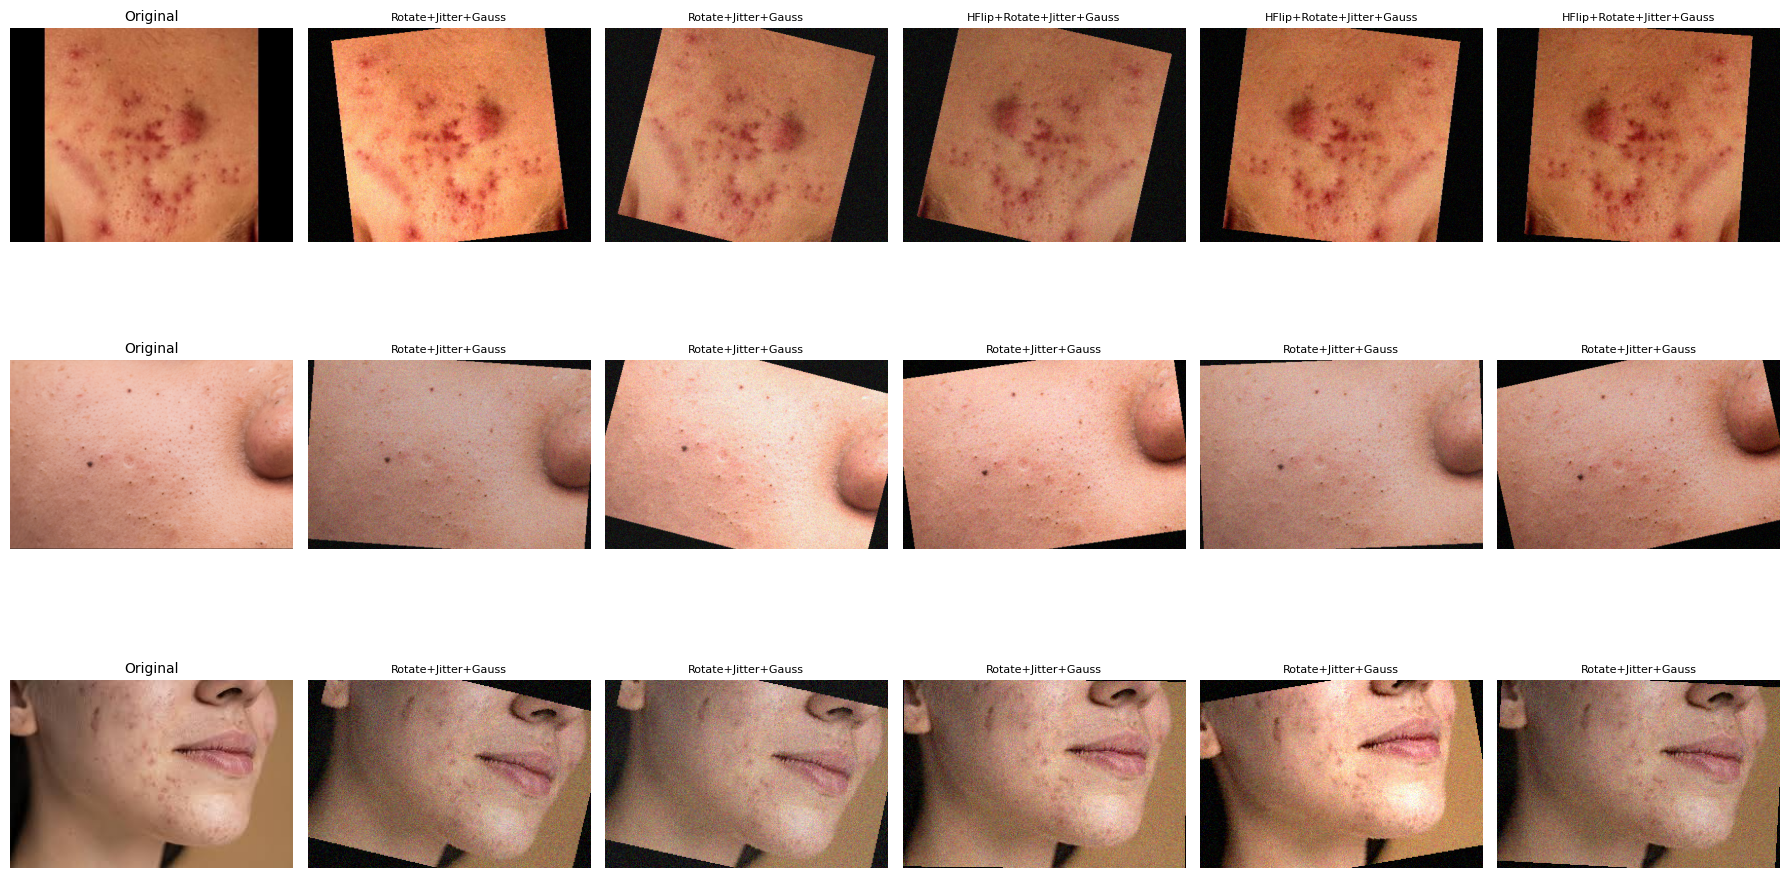

In [ ]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
import torchvision.transforms.functional as TF
import random
import os

class AddGaussianNoise:
    def __init__(self, mean=0.0, std=0.05):
        self.mean = mean
        self.std = std
    def __call__(self, tensor):
        return tensor + torch.randn_like(tensor) * self.std + self.mean

def unnormalize(tensor):
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)
    std  = torch.tensor([0.229, 0.224, 0.225]).view(3,1,1)
    return tensor * std + mean

def make_aug(img_pil):
    """Tạo 1 ảnh augmented + trả về tên augment đã áp dụng"""
    aug_img = img_pil.copy()
    names = []

    if random.random() < 0.5:
        aug_img = TF.hflip(aug_img)
        names.append("HFlip")

    angle = random.uniform(-15, 15)
    aug_img = TF.rotate(aug_img, angle)
    names.append("Rotate")

    aug_img = transforms.ColorJitter(brightness=0.2, contrast=0.2)(aug_img)
    names.append("Jitter")

    aug_img = TF.to_tensor(aug_img)
    aug_img = AddGaussianNoise(std=0.05)(aug_img)
    names.append("Gauss")

    aug_img = TF.normalize(
        aug_img,
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
    aug_img = unnormalize(aug_img)
    aug_img = aug_img.permute(1,2,0).clamp(0,1)

    return aug_img, names


if __name__ == "__main__":

    origin_paths = [
        "MauTest/mun_1.jpg",
        "MauTest/dauden_1.png",
        "MauTest/seo_2.jpeg",
    ]

    for p in origin_paths:
        if not os.path.exists(p):
            raise FileNotFoundError(f"Không tìm thấy ảnh: {p}")

    n_rows = len(origin_paths)
    n_cols = 6  # 1 original + 5 aug

    plt.figure(figsize=(18, 3.5 * n_rows))

    for r, path in enumerate(origin_paths):
        img = Image.open(path).convert("RGB")

        ax = plt.subplot(n_rows, n_cols, r*n_cols + 1)
        ax.imshow(img)
        ax.set_title("Original", fontsize=10)
        ax.axis("off")

        for i in range(5):
            aug_img, names = make_aug(img)
            ax = plt.subplot(n_rows, n_cols, r*n_cols + (i+2))
            ax.imshow(aug_img)
            ax.set_title("+".join(names), fontsize=8)
            ax.axis("off")

    plt.tight_layout()
    plt.show()



